In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("C:\\Users\\moonw\\Documents\\Sena\\Analisis exploratorio de datos Python\\Actividades y ajercicios\\Docs\\DatosSeguros.csv")
df.groupby('region')['region'].count()

region
Antioquia       326
Boyaca          327
Caribe          332
Cundinamarca    364
Name: region, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1349 non-null   int64  
 1   sexo          1349 non-null   object 
 2   imc           1347 non-null   float64
 3   hijos         1349 non-null   int64  
 4   fumador       1347 non-null   object 
 5   region        1349 non-null   object 
 6   valor_seguro  1349 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.9+ KB


In [9]:
df.isnull().sum()

df = df.dropna(axis=0, how='any')
df = df.drop_duplicates()


In [12]:
rangos = [17, 28, 38, 48, 58, 68]
nombrerango = ['A', 'B', 'C', 'D', 'E']
df['rango_edad'] = pd.cut(df['edad'], rangos, labels=nombrerango)
df

,edad,sexo,imc,hijos,fumador,region,valor_seguro,rango_edad
0,19,F,27.900,0,yes,Caribe,16884.92400,A
3,18,M,33.770,1,no,Cundinamarca,1725.55230,A
4,28,M,33.000,3,no,Cundinamarca,4449.46200,A
5,33,M,22.705,0,no,Antioquia,21984.47061,B
6,32,M,28.880,0,no,Antioquia,3866.85520,B
...,...,...,...,...,...,...,...,...
1342,50,M,30.970,3,no,Antioquia,10600.54830,D
1343,18,F,31.920,0,no,Boyaca,2205.98080,A
1344,18,F,36.850,0,no,Cundinamarca,1629.83350,A
1346,21,F,25.800,0,no,Caribe,2007.94500,A


C:\Users\moonw\AppData\Local\Temp\ipykernel_11316\4067338028.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_rango_edad = df['rango_edad'].groupby(df['rango_edad']).count()


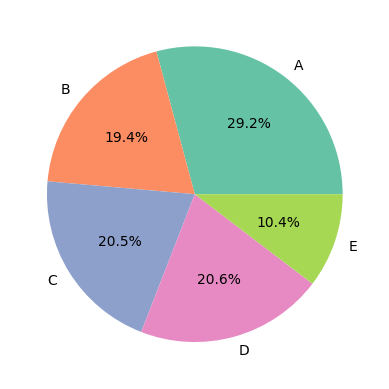

In [18]:
total_rango_edad = df['rango_edad'].groupby(df['rango_edad']).count()
labels = ["A", "B", "C", "D", "E"]
colors = sns.color_palette("Set2")[0:5]

plt.pie(total_rango_edad, labels=labels, colors=colors,autopct='%1.1f%%')
plt.show()

In [20]:
correlacion = df.corr()
sns.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True)

ValueError: could not convert string to float: 'F'

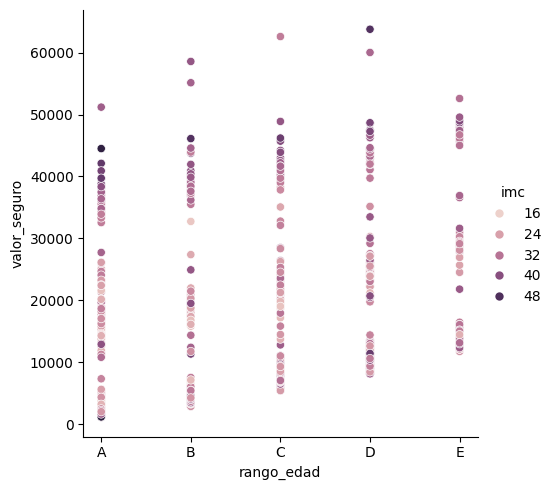

In [22]:
sns.relplot(x='rango_edad', y='valor_seguro', hue='imc', data=df)

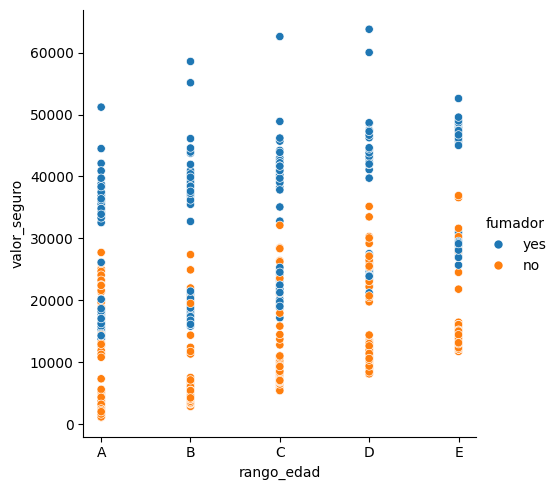

In [25]:
sns.relplot(data=df, x='rango_edad', y='valor_seguro', hue='fumador')

<Axes: xlabel='region', ylabel='valor_seguro'>

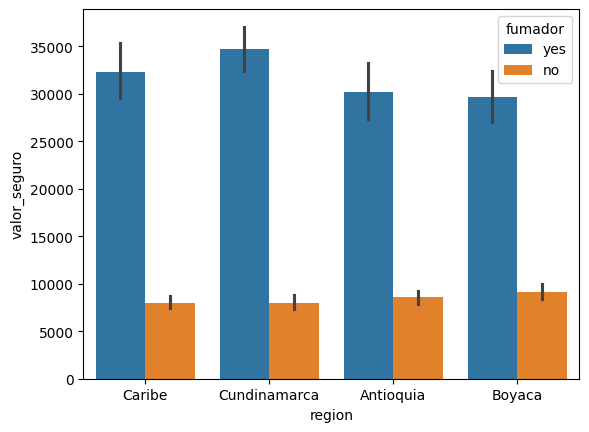

In [26]:
sns.barplot(data=df, x='region' ,y='valor_seguro', hue='fumador')